# Analysis of the data of Airbnb

This data is used to understand the trend of Airbnb by using the CRISP-DM, I am trying to understand the trend of data and get the answer to some question for that data


# CRISP-DM :
#### Business Understanding
#### Data Understanding
#### Prepare Data
#### Data Modeling
#### Evaluate the Results
#### Deploy

### Find out the answers to the question
1. Which type of Property is more reviews per month by the AirBNB customers?
2. Which is the most demanded place in Amsterdam?
3. Which type of room is more preferable by the Airbnb customers?
4. Neighbourhood Cleansed.
5. Most liked property type. 
6. The average price of Rooms.
7. Average price depending on neighborhood
8. Response time of the host.
 
To find out the answer to these questions we want to use the CRISP-DM method. by using this method we get answers very efficiently.


In [1]:
# loading some libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
import statistics
from collections import Counter

%matplotlib inline

# A. Read the Data

#### Business Understanding :

Business understanding is what are the business objectives? and what am I trying to optimize? these are the questions we want to remember at the start of business understanding. After that, we go forward.


In [ ]:
# load the listing data
df = pd.read_csv('listings.csv')
df.head()

In [3]:
# load the Calendar data
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,193038,2020-04-18,t,$75.00,$75.00,3.0,1125.0
1,2818,2020-04-19,f,$69.00,$69.00,3.0,1125.0
2,2818,2020-04-20,t,$59.00,$59.00,3.0,1125.0
3,2818,2020-04-21,t,$59.00,$59.00,3.0,1125.0
4,2818,2020-04-22,t,$59.00,$59.00,3.0,1125.0


In [4]:
# load the Review data
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,date
0,2818,2009-03-30
1,2818,2009-04-24
2,2818,2009-05-03
3,2818,2009-05-18
4,2818,2009-05-25


In [5]:
# Total size of data(rows * columns)
df.shape

(19362, 106)

In [6]:
# Total size of calendar data(rows * columns)
df_calendar.shape

(7068247, 7)

In [7]:
# total size of reviews data( rows * cloumns)
df_reviews.shape

(489777, 2)

# B. Clean the data

#### Data Understanding :
In data understanding, we want to clear about some questions, What is the quantity and quality of data? , what do different data items represent? and which data is relevant o the objective?

In [8]:
# finding of the missing value of data

missing_data = df.isnull()
missing_data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19357,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
19358,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
19359,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
19360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [9]:
# finding of the missing value of calendar data
missing_calendar_data = df_calendar.isnull()
missing_calendar_data

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7068242,False,False,False,False,False,False,False
7068243,False,False,False,False,False,False,False
7068244,False,False,False,False,False,False,False
7068245,False,False,False,False,False,False,False


In [10]:
# finding of the missing value of data
missing_reviews_data = df_reviews.isnull()
missing_reviews_data

,listing_id,date
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
489772,False,False
489773,False,False
489774,False,False
489775,False,False


In [11]:
# droping the null values form data
df.dropna(axis = 0, how = 'any')
df.head()

df_calendar.dropna(axis = 0, how = 'any')

df_reviews.dropna(axis = 0, how = 'any')

,listing_id,date
0,2818,2009-03-30
1,2818,2009-04-24
2,2818,2009-05-03
3,2818,2009-05-18
4,2818,2009-05-25
...,...,...
489772,42934529,2020-03-21
489773,42934922,2020-03-26
489774,42947577,2020-03-20
489775,43031829,2020-04-05


In [12]:
# counting index data
df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

In [13]:
# counting index of calendar
df_calendar.columns.values

array(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'], dtype=object)

In [14]:
# # counting index of reviews
df_reviews.columns.values

array(['listing_id', 'date'], dtype=object)

# C. Describing Data

In [15]:
# describe the data
df.describe(include = "all")

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.936200e+04,19362,1.936200e+04,19362,19329,18767,14255,19135,19362,13415,...,19362,19362,19362,19362,19362,19362.000000,19362.000000,19362.000000,19362.000000,17078.000000
unique,NaN,19362,NaN,5,18869,18259,13869,18885,1,12290,...,2,1,5,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/19422981,NaN,2020-04-17,Amsterdam,The hotel is located in a historic building wi...,I'm sure you will enjoy your stay at my place.,Hotel Jansen is a new Short Stay hotel in Amst...,none,Oud West is close to the city-centre and close...,...,f,f,strict_14_with_grace_period,f,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,8323,36,15,26,13,19362,37,...,14296,19362,7626,19158,19098,NaN,NaN,NaN,NaN,NaN
mean,1.973676e+07,NaN,2.020042e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.991117,1.491168,0.410495,0.004907,0.826230
std,1.204482e+07,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.588993,4.349848,1.277987,0.078902,1.337525
min,2.818000e+03,NaN,2.020042e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.830531e+06,NaN,2.020042e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.190000
50%,1.874661e+07,NaN,2.020042e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.430000
75%,2.900125e+07,NaN,2.020042e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.860000


In [16]:
# describe the calendar data
df_calendar.describe(include = "all")

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,7.068247e+06,7068247,7068247,7068247,7068247,7.067389e+06,7.067389e+06
unique,NaN,369,2,1296,1297,NaN,NaN
top,NaN,2020-11-16,f,$150.00,$150.00,NaN,NaN
freq,NaN,19362,5956632,393432,391786,NaN,NaN
mean,1.973620e+07,NaN,NaN,NaN,NaN,3.617540e+00,2.097263e+05
std,1.204456e+07,NaN,NaN,NaN,NaN,1.529362e+01,2.118719e+07
min,2.818000e+03,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00
25%,9.829578e+06,NaN,NaN,NaN,NaN,2.000000e+00,2.100000e+01
50%,1.874645e+07,NaN,NaN,NaN,NaN,2.000000e+00,1.125000e+03
75%,2.900137e+07,NaN,NaN,NaN,NaN,3.000000e+00,1.125000e+03


# D. Analysis

## 1. Which type of Property gets more reviews per month by the Airbnb customers? 

In [17]:
df.groupby(['property_type']).mean()['reviews_per_month'].sort_values().dropna()

property_type
Earth house           0.060000
Dome house            0.090000
Lighthouse            0.130000
Yurt                  0.140000
Bus                   0.330000
Tipi                  0.360000
Cottage               0.536000
Camper/RV             0.610000
Campsite              0.660000
Apartment             0.706358
House                 0.752148
Aparthotel            0.762375
Condominium           0.828251
Chalet                0.920000
Bungalow              0.940000
Loft                  0.974164
Villa                 0.987667
Townhouse             0.998861
Barn                  1.006667
Tiny house            1.045714
Boutique hotel        1.110286
Castle                1.190000
Serviced apartment    1.245763
Boat                  1.319169
Island                1.330000
Houseboat             1.545213
Other                 1.824167
Farm stay             2.131429
Cabin                 2.154444
Bed and breakfast     2.170083
Guesthouse            2.208649
Hotel                 2.2

#### Hostels get more reviews per month than any other type of Property liked by the customers of Airbnb and it gets the reviews per month = 8.5

In [18]:
df[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']].describe

<bound method NDFrame.describe of          price weekly_price monthly_price security_deposit cleaning_fee
0       $59.00          NaN     $1,500.00          $200.00       $60.00
1      $100.00          NaN           NaN              NaN          NaN
2      $125.00      $650.00     $2,000.00          $300.00       $40.00
3      $155.00      $810.00     $2,500.00            $0.00        $0.00
4       $75.00      $499.00     $1,956.00              NaN          NaN
...        ...          ...           ...              ...          ...
19357   $80.00          NaN           NaN              NaN          NaN
19358   $45.00          NaN           NaN            $0.00       $15.00
19359  $160.00          NaN           NaN              NaN          NaN
19360  $149.00          NaN           NaN          $750.00       $60.00
19361   $69.00          NaN           NaN              NaN          NaN

[19362 rows x 5 columns]>

In [19]:
# host locations 
df.host_location

0        Amsterdam, Noord-Holland, The Netherlands
1        Amsterdam, Noord-Holland, The Netherlands
2                New York, New York, United States
3        Amsterdam, Noord-Holland, The Netherlands
4        Amsterdam, Noord-Holland, The Netherlands
                           ...                    
19357        Amsterdam, North Holland, Netherlands
19358        Amsterdam, North Holland, Netherlands
19359                                        Spain
19360        Amsterdam, North Holland, Netherlands
19361                                           NL
Name: host_location, Length: 19362, dtype: object

## 2. Which host locations are more demanded in Amsterdam?

In [20]:
# Explore Categorical Feature - host_location
df_hostlocation =('Value counts for host_location: ', df['host_location'].value_counts())
df_hostlocation

('Value counts for host_location: ',
 Amsterdam, North Holland, Netherlands               10511
 Amsterdam, North Holland, The Netherlands            3819
 NL                                                   1646
 Amsterdam, Noord-Holland, The Netherlands            1296
 Netherlands                                           514
                                                     ...  
 Granada, Andalusia, Spain                               1
 José Ignacio, Departamento de Maldonado, Uruguay        1
 Marseille, Provence-Alpes-Côte d'Azur, France           1
 Ulm, Baden-Wurttemberg, Germany                         1
 Zeist, Utrecht, Netherlands                             1
 Name: host_location, Length: 561, dtype: int64)

#### North-Holland, Netherlands is the most demanded place in Amsterdam for  Airbnb.
#### Number of hosts in Amsterdam_north holland_netherlands = 10511

## 3. Which type of rooms is more preferable by the customer of Airbnb?

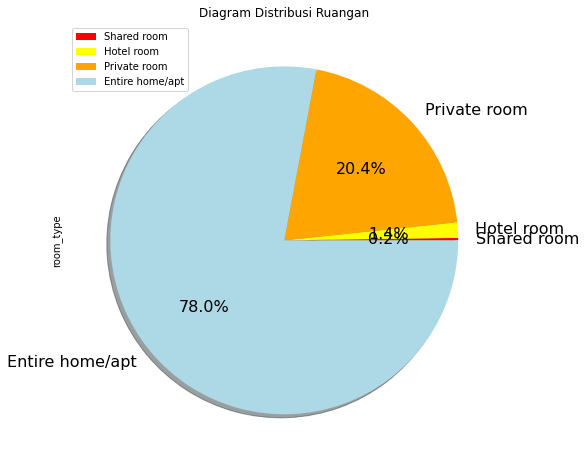

In [21]:
room = df.room_type
r = Counter(room)


room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']

colors_list = ['red', 'yellow', 'orange', 'lightblue', 'lightgreen']
room_df.plot.pie(y = 'room_type', 
                 
                 figsize = (8, 8),
                 fontsize = 16, 
                 autopct = '%1.1f%%',
                 colors=colors_list,
                 legend = True,
                 shadow=True,
                 title = 'Diagram Distribusi Ruangan')

#### The entire home or apartment is more preferable by the customers.

## 4. Neighbourhood Cleansed?

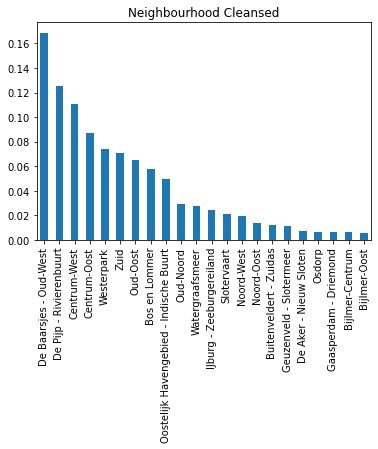

In [22]:
# Explore Categorical Feature - neighborhood_group_cleansed
neigh_vals = df['neighbourhood_cleansed'].value_counts()
(neigh_vals/df.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Cleansed");


## 5. Most liked property type? 

In [23]:
df_property = df['property_type'].value_counts()

df_property

Apartment                 14679
House                      1631
Townhouse                   669
Bed and breakfast           383
Loft                        371
Condominium                 340
Boat                        323
Houseboat                   310
Guest suite                 148
Aparthotel                  121
Serviced apartment           75
Hotel                        57
Boutique hotel               46
Guesthouse                   38
Villa                        37
Other                        32
Hostel                       28
Tiny house                   14
Cottage                      13
Cabin                        11
Farm stay                     7
Bungalow                      5
Barn                          4
Camper/RV                     3
Earth house                   2
Island                        2
Casa particular (Cuba)        2
Campsite                      2
Chalet                        2
Yurt                          2
Bus                           1
Castle  

#### House is the most liked property type of customers.

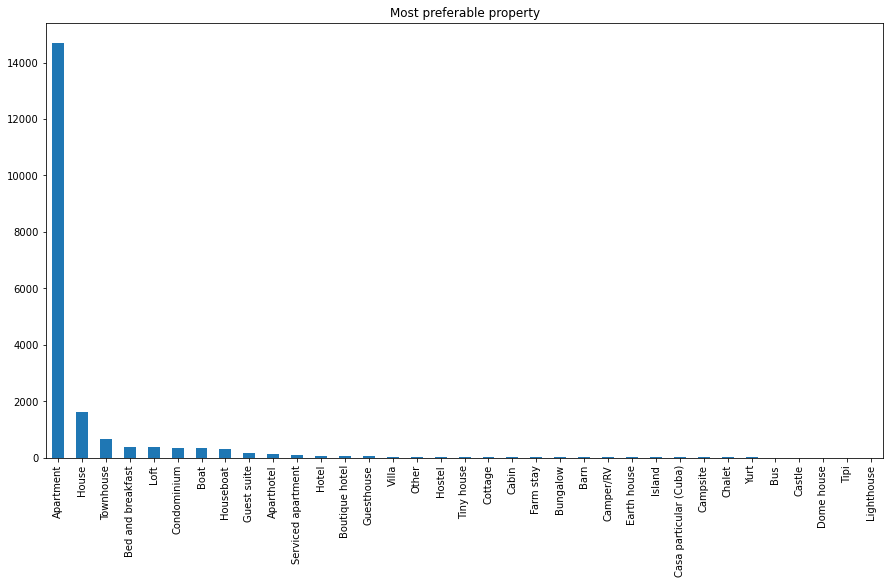

In [24]:
df_property.plot.bar(x = 'property_type',
                          y = 'number_of_listings',
                          figsize = (15, 8),
                          title = 'Most preferable property',
                          legend = False)

In [25]:
df_price = df['price'].value_counts()
df_price

$150.00      1302
$100.00      1013
$120.00       907
$200.00       787
$125.00       615
             ... 
$5.00           1
$465.00         1
$7,550.00       1
$1,285.00       1
$464.00         1
Name: price, Length: 452, dtype: int64

## 6. The average price of Rooms?

In [26]:
# Average price
df_price.mean().sum()

42.836283185840706

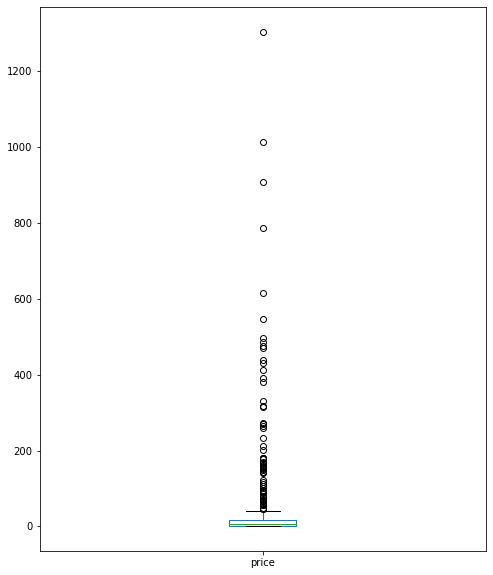

In [27]:
df_price.plot(kind = "box", figsize = (8,10))

##  7. The average price of area depending on the neighborhood?

                                             price
neighbourhood_cleansed                            
Centrum-Oost                            225.761679
Centrum-West                            225.150679
Zuid                                    182.685131
IJburg - Zeeburgereiland                169.226782
Oud-Noord                               169.191228
De Pijp - Rivierenbuurt                 168.312990
Westerpark                              152.896792
Buitenveldert - Zuidas                  152.795833
De Baarsjes - Oud-West                  151.462056
Watergraafsmeer                         146.838649
Oud-Oost                                146.694071
De Aker - Nieuw Sloten                  144.534247
Oostelijk Havengebied - Indische Buurt  137.800000
Noord-Oost                              131.496296
Noord-West                              128.874016
Geuzenveld - Slotermeer                 127.506726
Bos en Lommer                           123.933333
Slotervaart                    

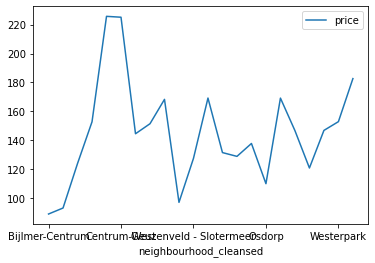

In [28]:
# Plot the average price by neighborhood

# In order to average price, we will be converting it to float and removing the $ sign
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

print(df.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
df.groupby(['neighbourhood_cleansed'])[['price']].mean().plot();

#### Max average price is  225.76 of centrum_oost which depends on the neighbourhood_cleansed

In [29]:
# Type of beds counts

df_bed_types= df['bed_type'].value_counts()
df_bed_types

Real Bed         19212
Pull-out Sofa      101
Futon               32
Airbed              12
Couch                5
Name: bed_type, dtype: int64

In [30]:
# extracharges for extra peoples in rooms 

df_extrapeople = df['extra_people'].value_counts()
df_extrapeople

$0.00      13272
$25.00       958
$50.00       766
$30.00       752
$20.00       714
           ...  
$155.00        1
$52.00         1
$168.00        1
$255.00        1
$97.00         1
Name: extra_people, Length: 108, dtype: int64

In [31]:
# Correlation between some columns.
df_corr = df[['monthly_price', 'reviews_per_month', 'availability_30','availability_60','availability_90', 'availability_365',
   'minimum_nights', 'maximum_nights', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']]
df_corr

,monthly_price,reviews_per_month,availability_30,availability_60,availability_90,availability_365,minimum_nights,maximum_nights,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,"$1,500.00",2.06,29,59,89,169,3,15,59.0,NaN,"$1,500.00",$200.00,$60.00
1,NaN,2.76,0,0,29,106,1,365,100.0,NaN,NaN,NaN,NaN
2,"$2,000.00",0.18,19,22,22,132,14,180,125.0,$650.00,"$2,000.00",$300.00,$40.00
3,"$2,500.00",2.15,14,22,32,172,2,730,155.0,$810.00,"$2,500.00",$0.00,$0.00
4,"$1,956.00",2.82,25,44,52,210,2,1825,75.0,$499.00,"$1,956.00",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19357,NaN,NaN,7,12,18,18,3,1125,80.0,NaN,NaN,NaN,NaN
19358,NaN,NaN,12,12,12,12,7,1125,45.0,NaN,NaN,$0.00,$15.00
19359,NaN,NaN,30,60,90,365,1,1125,160.0,NaN,NaN,NaN,NaN
19360,NaN,NaN,26,41,48,48,7,60,149.0,NaN,NaN,$750.00,$60.00


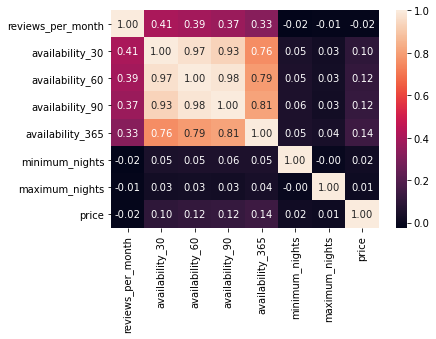

In [32]:
sns.heatmap(df_corr.corr() , annot = True, fmt = ".2f" )

## 8. Response time of the host.

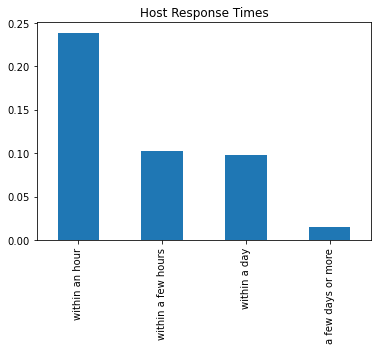

In [33]:
host_response_vals = df['host_response_time'].value_counts()
(host_response_vals/df.shape[0]).plot(kind="bar");
plt.title("Host Response Times");

#### The maximum response time of the host is less an hour.

In [34]:
# number of booking on specific dates
df_calendar_dates = df_calendar['date'].value_counts()
df_calendar_dates

2020-11-16    19362
2021-01-21    19362
2021-03-18    19362
2020-07-28    19362
2020-07-18    19362
              ...  
2020-04-17    10820
2021-04-17     8876
2021-04-18     3585
2020-04-16     2185
2021-04-19        9
Name: date, Length: 369, dtype: int64

Text(0.5, 0, 'dates')

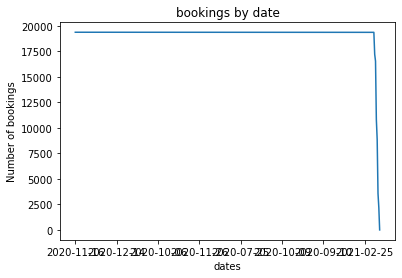

In [35]:

df_calendar_dates.plot(kind = "line")
plt.title('bookings by date')
plt.ylabel('Number of bookings')
plt.xlabel('dates')

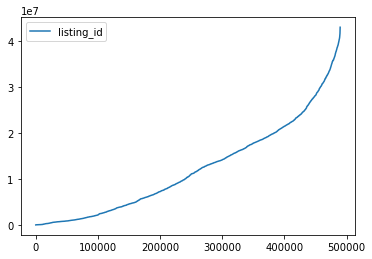

In [36]:
# reviwes of customers
df_reviews.plot(kind = 'line')